In [2]:
import satellite_images_nso_extractor.api.nso_georegion as nso
from settings import nso_username, nso_password, path_geojson,  output_path
# Optional
from settings import height_band_filepath, cloud_detection_model_path, links_must_contain

# Search for satellite images in geojson and download links

In [3]:
# Make a georegion object
georegion = nso.nso_georegion(
    path_to_geojson=path_geojson, 
    output_folder=output_path,
    username=nso_username,
    password=nso_password,
    )

Multipolygon detected!
Buffering to grow the different multipolygons together in one polygon for retrieving links


In [22]:
# This methods finds all download links of satellite images which overlap for 50% or more with region in the geojson, starting from date 2022-01-01
links = georegion.retrieve_download_links(max_diff=0.1, start_date="2019-01-01" ,cloud_coverage_whole=60)

Cloudcover check:
Passed cloud check
Going into region check:
Max_diff in method 0.1
[[ 4.74206318  4.74203108  4.7420306  ...  4.74206323  4.7420632
   4.74206318]
 [52.10920891 52.10921904 52.1092192  ... 52.1092078  52.10920835
  52.10920891]]
Passed region check
Cloudcover check:
Passed cloud check
Going into region check:
Max_diff in method 0.1
[[ 4.74206318  4.74203108  4.7420306  ...  4.74206323  4.7420632
   4.74206318]
 [52.10920891 52.10921904 52.1092192  ... 52.1092078  52.10920835
  52.10920891]]
Passed region check
Cloudcover check:
Passed cloud check
Going into region check:
Max_diff in method 0.1
[[ 4.74206318  4.74203108  4.7420306  ...  4.74206323  4.7420632
   4.74206318]
 [52.10920891 52.10921904 52.1092192  ... 52.1092078  52.10920835
  52.10920891]]
Passed region check
Cloudcover check:
Passed cloud check
Going into region check:
Max_diff in method 0.1
[[ 4.74206318  4.74203108  4.7420306  ...  4.74206323  4.7420632
   4.74206318]
 [52.10920891 52.10921904 52.10921

In [6]:
years = ["2019","2020","2021", "2022"]
months = ["05","06","07","08"]

# PNEO data

In [4]:
# Example filter on resolution and bands
pneo_links = links[links['resolution'] == "30cm"]
pneo_links = pneo_links[pneo_links["link"].str.contains("RGBNED")]
pneo_links = pneo_links.sort_values("percentage_geojson")

In [5]:
for index,value in pneo_links.iterrows():

    
    georegion.execute_link(value["link"], plot=False)

Searching for: E:/data/nieuwkoopse_plassen_schippersgat\20230905_105231_PNEO-03_1_1**Schippersgat*cropped*.tif
No Found files
Starting download to: E:/data/nieuwkoopse_plassen_schippersgat/20230905_105231_PNEO-03_1_1_30cm_RGBNED_12bit_PNEO.zip
Extracting files
Extracted folder is: E:/data/nieuwkoopse_plassen_schippersgat/20230905_105231_PNEO-03_1_1_30cm_RGBNED_12bit_PNEO
cropping file E:/data/nieuwkoopse_plassen_schippersgat/20230905_105231_PNEO-03_1_1_30cm_RGBNED_12bit_PNEO\20230905_105231_PNEO-03_1_1_30cm_RD_12bit_RGBNED_Uithoorn\20230905_105231_PNEO-03_1_1_30cm_RD_12bit_RGBNED_Uithoorn.tif
New cropped filename: E:/data/nieuwkoopse_plassen_schippersgat/20230905_105231_PNEO-03_1_1_30cm_RGBNED_12bit_PNEO\20230905_105231_PNEO-03_1_1_30cm_RD_12bit_RGBNED_Uithoorn\20230905_105231_PNEO-03_1_1_30cm_RD_12bit_RGBNED_Uithoorn_Schippersgat_cropped.tif
Cropping multipolygons
raster path opened
Assuming PNEO Satellite columns
convert to RD
finished cropping E:/data/nieuwkoopse_plassen_schippersga

# Superview data

In [23]:
# Example filter on resolution and bands
superview_links = links[links['resolution'] == "50cm"]
superview_links = superview_links[superview_links["link"].str.contains("RGBI")]
superview_links = superview_links.sort_values("percentage_geojson")

In [24]:
#Returns a pandas dataframe columns with: 1.The Download Link. 2.Percentage of satellite area which covers the selected submitted georegion 3.The polygon of what is missing compared with the submitted georegion. 4.The satellite images that cover the submitted georegion
# 5. The date when the satellite image was taken. 6. The satellite constellation. 7. The resolution of the satellite image
superview_links

,link,percentage_geojson,missing_polygon,covered_polygon,date,satellite,resolution
611,https://api.satellietdataportaal.nl/v1/downloa...,0.103365,POLYGON ((4.7420310765276215 52.10921904312646...,"POLYGON ((4.851161197350351 52.1656607126579, ...",20190729,SV1-02,50cm
616,https://api.satellietdataportaal.nl/v1/downloa...,0.103365,POLYGON ((4.7420310765276215 52.10921904312646...,"POLYGON ((4.851161197350351 52.1656607126579, ...",20190729,SV1-02,50cm
356,https://api.satellietdataportaal.nl/v1/downloa...,0.134476,"POLYGON ((4.758583171037707 52.12868279642031,...",POLYGON ((4.7420310765276215 52.10921904312646...,20190704,SV1-03,50cm
351,https://api.satellietdataportaal.nl/v1/downloa...,0.134476,"POLYGON ((4.758583171037707 52.12868279642031,...",POLYGON ((4.7420310765276215 52.10921904312646...,20190704,SV1-03,50cm
491,https://api.satellietdataportaal.nl/v1/downloa...,0.136411,"POLYGON ((4.75702809691031 52.12595499699504, ...",POLYGON ((4.7420310765276215 52.10921904312646...,20200713,SV1-04,50cm
...,...,...,...,...,...,...,...
671,https://api.satellietdataportaal.nl/v1/downloa...,0.841471,POLYGON ((4.7420310765276215 52.10921904312646...,"POLYGON ((4.757635397402045 52.12700080108716,...",20191026,SV1-04,50cm
386,https://api.satellietdataportaal.nl/v1/downloa...,0.841657,MULTIPOLYGON (((4.7420310765276215 52.10921904...,"POLYGON ((4.755708872591484 52.12344933079491,...",20190416,SV1-02,50cm
381,https://api.satellietdataportaal.nl/v1/downloa...,0.841657,MULTIPOLYGON (((4.7420310765276215 52.10921904...,"POLYGON ((4.755708872591484 52.12344933079491,...",20190416,SV1-02,50cm
56,https://api.satellietdataportaal.nl/v1/downloa...,0.953442,MULTIPOLYGON (((4.7420310765276215 52.10921904...,"POLYGON ((4.744638780802208 52.11224768332306,...",20220705,SV2-01,50cm


Searching for: E:/data/nieuwkoopse_plassen\20210614_111318_SV1-03**Nieuwkoopse Plassen & De Haeck*cropped*.tif
Found files: ['E:/data/nieuwkoopse_plassen\\20210614_111318_SV1-03_SV_RD_11bit_RGBI_50cm_Boskoop_Nieuwkoopse Plassen & De Haeck_cropped.tif']
File is already cropped
E:/data/nieuwkoopse_plassen\20210614_111318_SV1-03_SV_RD_11bit_RGBI_50cm_Boskoop_Nieuwkoopse Plassen & De Haeck_cropped.tif is Ready
Searching for: E:/data/nieuwkoopse_plassen\20210614_111318_SV1-03**Nieuwkoopse Plassen & De Haeck*cropped*.tif
Found files: ['E:/data/nieuwkoopse_plassen\\20210614_111318_SV1-03_SV_RD_11bit_RGBI_50cm_Boskoop_Nieuwkoopse Plassen & De Haeck_cropped.tif']
File is already cropped
E:/data/nieuwkoopse_plassen\20210614_111318_SV1-03_SV_RD_11bit_RGBI_50cm_Boskoop_Nieuwkoopse Plassen & De Haeck_cropped.tif is Ready
Searching for: E:/data/nieuwkoopse_plassen\20210722_104909_SV1-01**Nieuwkoopse Plassen & De Haeck*cropped*.tif
No Found files
Starting download to: E:/data/nieuwkoopse_plassen/2021

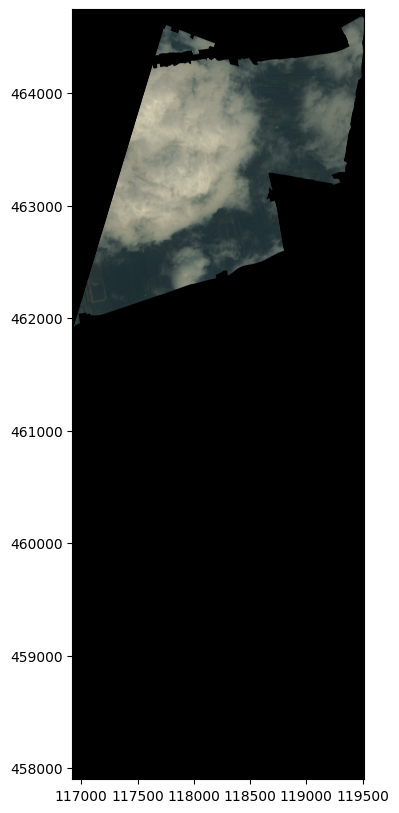

finished cropping E:/data/nieuwkoopse_plassen/20210722_104909_SV1-01_SV_RD_11bit_RGBI_50cm\20210722_104909_SV1-01_SV_RD_11bit_RGBI_50cm_Breukelen.tif
Cropped file is found at: E:/data/nieuwkoopse_plassen/20210722_104909_SV1-01_SV_RD_11bit_RGBI_50cm_Breukelen_Nieuwkoopse Plassen & De Haeck_cropped.tif
Succesfully cropped .tif file
E:/data/nieuwkoopse_plassen/20210722_104909_SV1-01_SV_RD_11bit_RGBI_50cm_Breukelen_Nieuwkoopse Plassen & De Haeck_cropped.tif is Ready
Searching for: E:/data/nieuwkoopse_plassen\20210722_104909_SV1-01**Nieuwkoopse Plassen & De Haeck*cropped*.tif
Found files: ['E:/data/nieuwkoopse_plassen\\20210722_104909_SV1-01_SV_RD_11bit_RGBI_50cm_Breukelen_Nieuwkoopse Plassen & De Haeck_cropped.tif']
File is already cropped
E:/data/nieuwkoopse_plassen\20210722_104909_SV1-01_SV_RD_11bit_RGBI_50cm_Breukelen_Nieuwkoopse Plassen & De Haeck_cropped.tif is Ready
Searching for: E:/data/nieuwkoopse_plassen\20210617_111534_SV1-04**Nieuwkoopse Plassen & De Haeck*cropped*.tif
Found fi

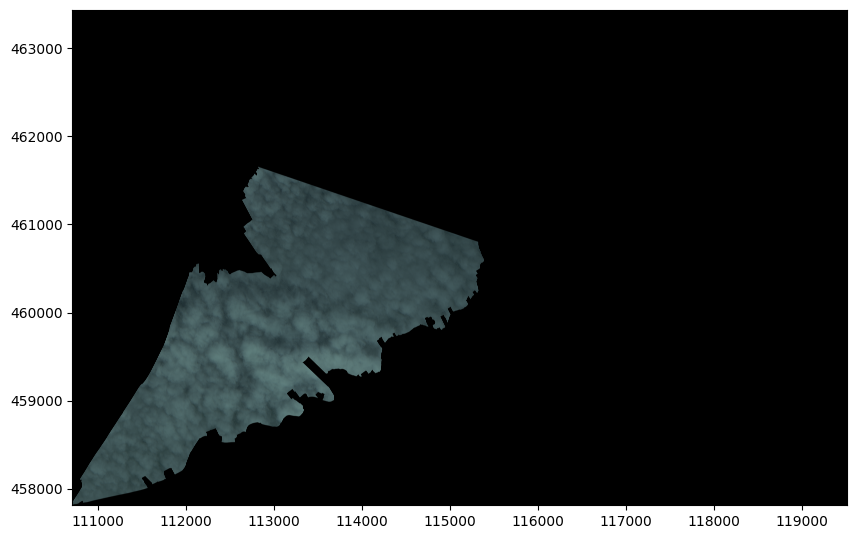

finished cropping E:/data/nieuwkoopse_plassen/20210811_111403_SV1-04_SV_RD_11bit_RGBI_50cm\20210811_111403_SV1-04_SV_RD_11bit_RGBI_50cm_Bodegraven.tif
Cropped file is found at: E:/data/nieuwkoopse_plassen/20210811_111403_SV1-04_SV_RD_11bit_RGBI_50cm_Bodegraven_Nieuwkoopse Plassen & De Haeck_cropped.tif
Succesfully cropped .tif file
E:/data/nieuwkoopse_plassen/20210811_111403_SV1-04_SV_RD_11bit_RGBI_50cm_Bodegraven_Nieuwkoopse Plassen & De Haeck_cropped.tif is Ready
Searching for: E:/data/nieuwkoopse_plassen\20210811_111403_SV1-04**Nieuwkoopse Plassen & De Haeck*cropped*.tif
Found files: ['E:/data/nieuwkoopse_plassen\\20210811_111403_SV1-04_SV_RD_11bit_RGBI_50cm_Bodegraven_Nieuwkoopse Plassen & De Haeck_cropped.tif']
File is already cropped
E:/data/nieuwkoopse_plassen\20210811_111403_SV1-04_SV_RD_11bit_RGBI_50cm_Bodegraven_Nieuwkoopse Plassen & De Haeck_cropped.tif is Ready
Searching for: E:/data/nieuwkoopse_plassen\20210617_111532_SV1-04**Nieuwkoopse Plassen & De Haeck*cropped*.tif
Fou

In [29]:
for index,value in superview_links[(superview_links['month'].isin(months )) & (superview_links['year'] == "2021")].iterrows():

    
    georegion.execute_link(value["link"],delete_zip_file=True) 

In [10]:
links = links.sort_values(by='date')

In [36]:
Form_links = links[links["link"].str.contains("RGBI")]
Form_links = Form_links[Form_links["resolution"] == "200cm"]

Searching for: E:/data/nieuwkoopse_plassen_schippersgat\20120322_102446_Form**Schippersgat*cropped*.tif
Found files: ['E:/data/nieuwkoopse_plassen_schippersgat\\20120322_102446_Form_200cm_RD_8bit_RGB_Breukelen_str01_01_Schippersgat_cropped.tif']
File is already cropped
E:/data/nieuwkoopse_plassen_schippersgat\20120322_102446_Form_200cm_RD_8bit_RGB_Breukelen_str01_01_Schippersgat_cropped.tif is Ready
Searching for: E:/data/nieuwkoopse_plassen_schippersgat\20120322_102446_Form**Schippersgat*cropped*.tif
Found files: ['E:/data/nieuwkoopse_plassen_schippersgat\\20120322_102446_Form_200cm_RD_8bit_RGB_Breukelen_str01_01_Schippersgat_cropped.tif']
File is already cropped
E:/data/nieuwkoopse_plassen_schippersgat\20120322_102446_Form_200cm_RD_8bit_RGB_Breukelen_str01_01_Schippersgat_cropped.tif is Ready
Searching for: E:/data/nieuwkoopse_plassen_schippersgat\20120331_102440_Form**Schippersgat*cropped*.tif
No Found files
Starting download to: E:/data/nieuwkoopse_plassen_schippersgat/20120331_102

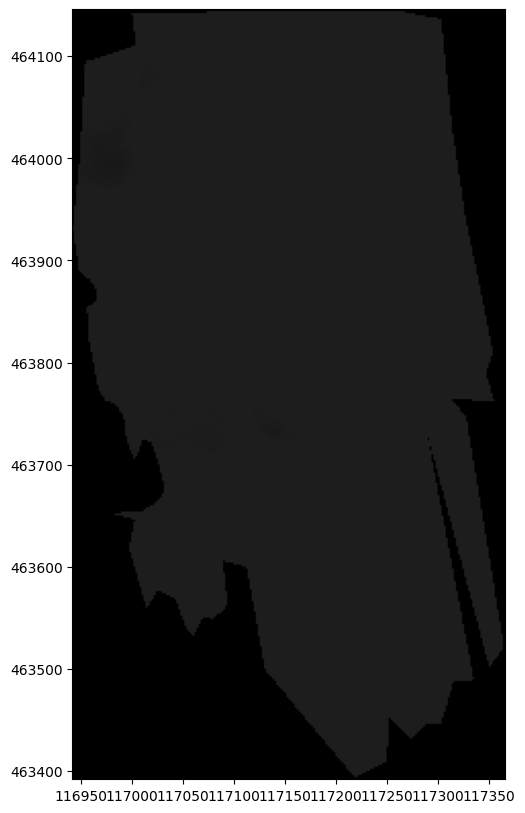

finished cropping E:/data/nieuwkoopse_plassen_schippersgat/20120331_102440_Form_Form_RD_8bit_RGBI_200cm\20120331_102440_Form_200cm_RD_8bit_RGBI_Breukelen.tif
Cropped file is found at: E:/data/nieuwkoopse_plassen_schippersgat/20120331_102440_Form_200cm_RD_8bit_RGBI_Breukelen_Schippersgat_cropped.tif
Succesfully cropped .tif file
E:/data/nieuwkoopse_plassen_schippersgat/20120331_102440_Form_200cm_RD_8bit_RGBI_Breukelen_Schippersgat_cropped.tif is Ready
Searching for: E:/data/nieuwkoopse_plassen_schippersgat\20120418_102429_Form**Schippersgat*cropped*.tif
No Found files
Starting download to: E:/data/nieuwkoopse_plassen_schippersgat/20120418_102429_Form_Form_RD_8bit_RGBI_200cm.zip
Extracting files
Extracted folder is: E:/data/nieuwkoopse_plassen_schippersgat/20120418_102429_Form_Form_RD_8bit_RGBI_200cm
cropping file E:/data/nieuwkoopse_plassen_schippersgat/20120418_102429_Form_Form_RD_8bit_RGBI_200cm\20120418_102429_Form_200cm_RD_8bit_RGBI_Breukelen.tif
New cropped filename: E:/data/nieuwk

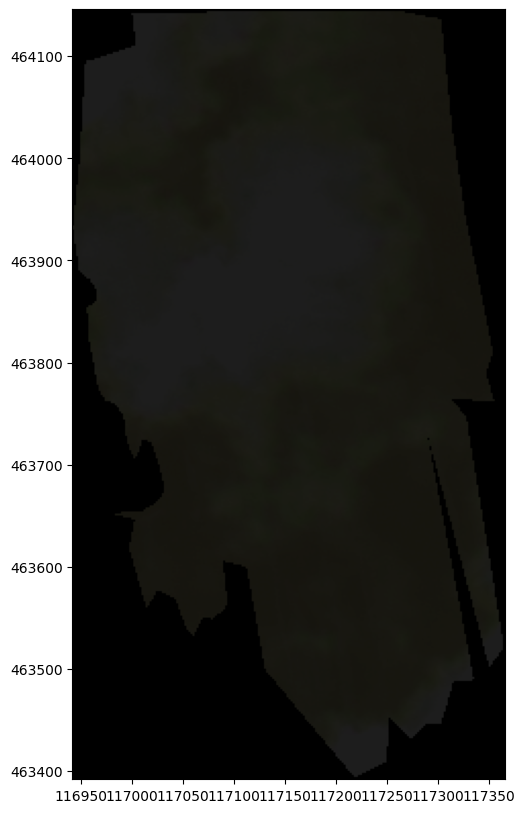

finished cropping E:/data/nieuwkoopse_plassen_schippersgat/20120418_102429_Form_Form_RD_8bit_RGBI_200cm\20120418_102429_Form_200cm_RD_8bit_RGBI_Breukelen.tif
Cropped file is found at: E:/data/nieuwkoopse_plassen_schippersgat/20120418_102429_Form_200cm_RD_8bit_RGBI_Breukelen_Schippersgat_cropped.tif
Succesfully cropped .tif file
E:/data/nieuwkoopse_plassen_schippersgat/20120418_102429_Form_200cm_RD_8bit_RGBI_Breukelen_Schippersgat_cropped.tif is Ready
Searching for: E:/data/nieuwkoopse_plassen_schippersgat\20120427_102423_Form**Schippersgat*cropped*.tif
Found files: ['E:/data/nieuwkoopse_plassen_schippersgat\\20120427_102423_Form_200cm_RD_8bit_PAN_Breukelen_Schippersgat_cropped.tif']
File is already cropped
E:/data/nieuwkoopse_plassen_schippersgat\20120427_102423_Form_200cm_RD_8bit_PAN_Breukelen_Schippersgat_cropped.tif is Ready
Searching for: E:/data/nieuwkoopse_plassen_schippersgat\20120506_102424_Form**Schippersgat*cropped*.tif
Found files: ['E:/data/nieuwkoopse_plassen_schippersgat\

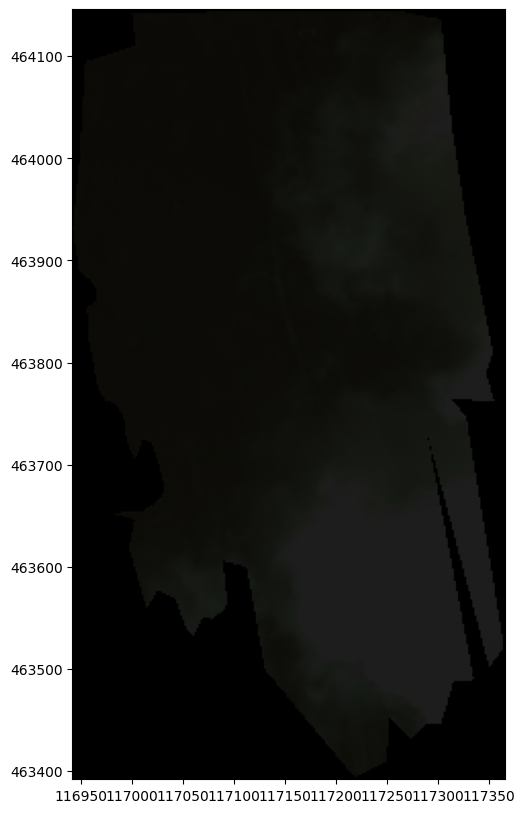

finished cropping E:/data/nieuwkoopse_plassen_schippersgat/20120515_102411_Form_Form_RD_8bit_RGBI_200cm\20120515_102411_Form_200cm_RD_8bit_RGBI_Woerden.tif
Cropped file is found at: E:/data/nieuwkoopse_plassen_schippersgat/20120515_102411_Form_200cm_RD_8bit_RGBI_Woerden_Schippersgat_cropped.tif
Succesfully cropped .tif file
E:/data/nieuwkoopse_plassen_schippersgat/20120515_102411_Form_200cm_RD_8bit_RGBI_Woerden_Schippersgat_cropped.tif is Ready
Searching for: E:/data/nieuwkoopse_plassen_schippersgat\20120524_102402_Form**Schippersgat*cropped*.tif
No Found files
Starting download to: E:/data/nieuwkoopse_plassen_schippersgat/20120524_102402_Form_Form_RD_8bit_RGBI_200cm.zip


In [40]:
for index, value in Form_links.iterrows():
    georegion.execute_link(value['link'], delete_zip_file=True)